In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# IMDb Dataset EDA
print("IMDb Dataset Overview:")
imdb = pd.read_csv(r"C:\Users\mzhan\Downloads\imdbdata.csv")
imdb

IMDb Dataset Overview:


,id,title,type,genres,averageRating,numVotes,releaseYear
0,tt0000009,Miss Jerry,movie,Romance,5.4,223.0,1894.0
1,tt0000147,The Corbett-Fitzsimmons Fight,movie,"Documentary, News, Sport",5.2,553.0,1897.0
2,tt0000502,Bohemios,movie,NaN,4.0,22.0,1905.0
3,tt0000574,The Story of the Kelly Gang,movie,"Action, Adventure, Biography",6.0,978.0,1906.0
4,tt0000591,The Prodigal Son,movie,Drama,5.6,31.0,1907.0
...,...,...,...,...,...,...,...
1049089,tt35963583,Operowym Glosem,tvSeries,Short,NaN,NaN,2020.0
1049090,tt35963592,As a Young Girl of Thirteen,movie,Documentary,NaN,NaN,2009.0
1049091,tt35963611,Ponoskins,tvMiniSeries,"Adventure, Animation, Comedy",NaN,NaN,2024.0
1049092,tt35963614,YoungArts,tvSeries,NaN,NaN,NaN,2011.0


In [25]:
# Quick overview
print(imdb.info())
print(imdb.head())

# Missing values
print("Missing values in IMDb dataset:")
print(imdb.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049094 entries, 0 to 1049093
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1049094 non-null  object 
 1   title          1049092 non-null  object 
 2   type           1049094 non-null  object 
 3   genres         946957 non-null   object 
 4   averageRating  450428 non-null   float64
 5   numVotes       450428 non-null   float64
 6   releaseYear    916453 non-null   float64
dtypes: float64(3), object(4)
memory usage: 56.0+ MB
None
          id                          title   type  \
0  tt0000009                     Miss Jerry  movie   
1  tt0000147  The Corbett-Fitzsimmons Fight  movie   
2  tt0000502                       Bohemios  movie   
3  tt0000574    The Story of the Kelly Gang  movie   
4  tt0000591               The Prodigal Son  movie   

                         genres  averageRating  numVotes  releaseYear  
0                  

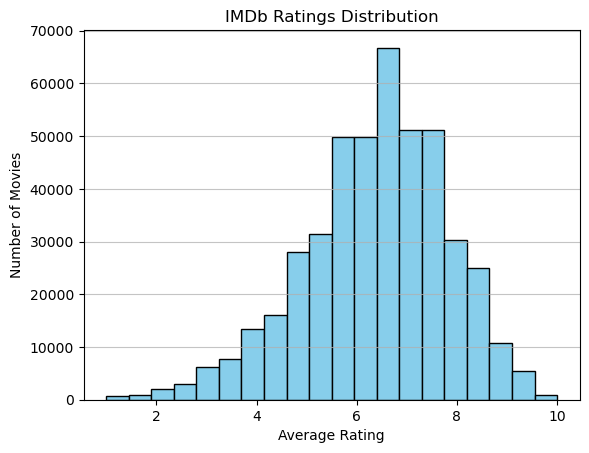

In [26]:
# Distribution of IMDb Ratings
plt.hist(imdb['averageRating'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.title('IMDb Ratings Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()

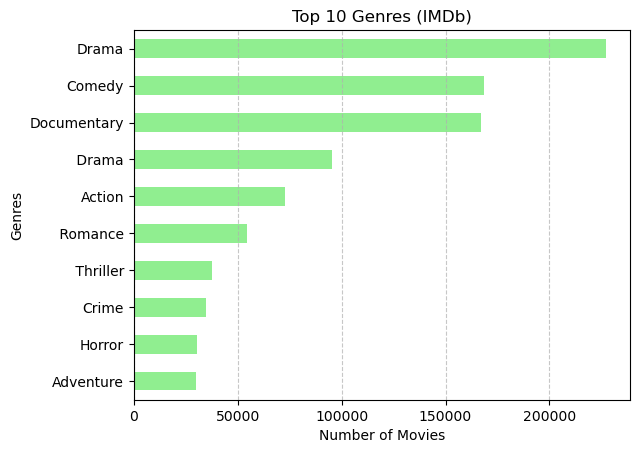

In [27]:
# Movies per genre
genres_series = imdb['genres'].dropna().str.split(',').explode()
top_genres = genres_series.value_counts().head(10)
top_genres.plot(kind='barh', color='lightgreen')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Top 10 Genres (IMDb)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

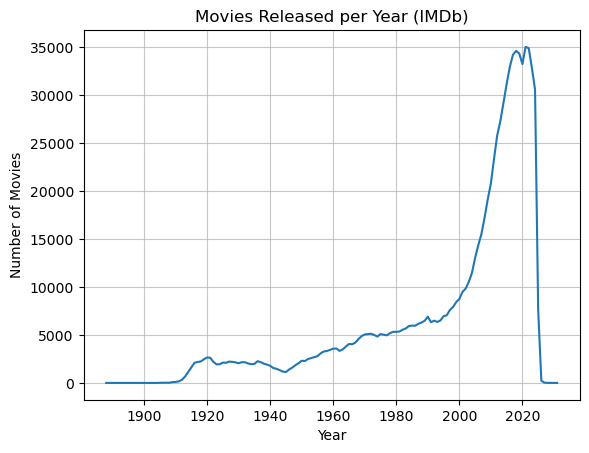

In [28]:
# Movies by release year
imdb['releaseYear'].dropna().astype(int).value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies Released per Year (IMDb)')
plt.grid(alpha=0.7)
plt.show()

In [29]:
# Load MovieLens datasets
ratings = pd.read_csv(r"C:\Users\mzhan\Downloads\ml-25m\ml-25m\ratings.csv")
movies = pd.read_csv(r"C:\Users\mzhan\Downloads\ml-25m\ml-25m\movies.csv")
genome_tags = pd.read_csv(r"C:\Users\mzhan\Downloads\ml-25m\ml-25m\genome-tags.csv")

# Overview
print(ratings.info())
print(movies.info())
print(genome_tags.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None


In [30]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [31]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [32]:
genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [33]:
genome_scores = pd.read_csv(r"C:\Users\mzhan\Downloads\ml-25m\ml-25m\genome-scores.csv")
genome_scores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [36]:
tags = pd.read_csv(r"C:\Users\mzhan\Downloads\ml-25m\ml-25m\tags.csv")
tags

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


In [41]:
tag_relevance = pd.merge(genome_scores, genome_tags, on='tagId', how='left')
movie_tags = pd.merge(tags, movies, on='movieId', how='left')
ratings_movies = pd.merge(ratings, movies, on='movieId', how='left')

In [38]:
ratings_movies

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance
...,...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,Ratatouille (2007),Animation|Children|Drama
25000091,162541,55768,2.5,1240951998,Bee Movie (2007),Animation|Comedy
25000092,162541,56176,2.0,1240950697,Alvin and the Chipmunks (2007),Children|Comedy
25000093,162541,58559,4.0,1240953434,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


In [39]:
movie_tags

,userId,movieId,tag,timestamp,title,genres
0,3,260,classic,1439472355,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1,3,260,sci-fi,1439472256,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
2,4,1732,dark comedy,1573943598,"Big Lebowski, The (1998)",Comedy|Crime
3,4,1732,great dialogue,1573943604,"Big Lebowski, The (1998)",Comedy|Crime
4,4,7569,so bad it's good,1573943455,You Only Live Twice (1967),Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611,Dr. Horrible's Sing-Along Blog (2008),Comedy|Drama|Musical|Sci-Fi
1093356,162521,103341,cornetto trilogy,1427311259,"World's End, The (2013)",Action|Comedy|Sci-Fi
1093357,162534,189169,comedy,1527518175,Ugly Nasty People (2017),Comedy
1093358,162534,189169,disabled,1527518181,Ugly Nasty People (2017),Comedy


In [40]:
tag_relevance

,movieId,tagId,relevance,tag
0,1,1,0.02875,007
1,1,2,0.02375,007 (series)
2,1,3,0.06250,18th century
3,1,4,0.07575,1920s
4,1,5,0.14075,1930s
...,...,...,...,...
15584443,206499,1124,0.11000,writing
15584444,206499,1125,0.04850,wuxia
15584445,206499,1126,0.01325,wwii
15584446,206499,1127,0.14025,zombie


In [ ]:
print("Missing Values:\n", ratings_movies.isnull().sum())
print("\nNumber of Duplicates:", ratings_movies.duplicated().sum())
print("\nData Types:\n", ratings_movies.dtypes)

Missing Values:
 userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

Number of Duplicates: 0

Data Types:
 userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object


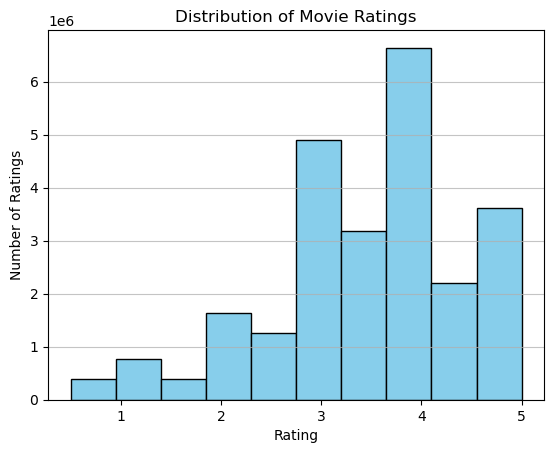


Top 10 Most Rated Movies:
 title
Forrest Gump (1994)                          81491
Shawshank Redemption, The (1994)             81482
Pulp Fiction (1994)                          79672
Silence of the Lambs, The (1991)             74127
Matrix, The (1999)                           72674
Star Wars: Episode IV - A New Hope (1977)    68717
Jurassic Park (1993)                         64144
Schindler's List (1993)                      60411
Braveheart (1995)                            59184
Fight Club (1999)                            58773
Name: rating, dtype: int64


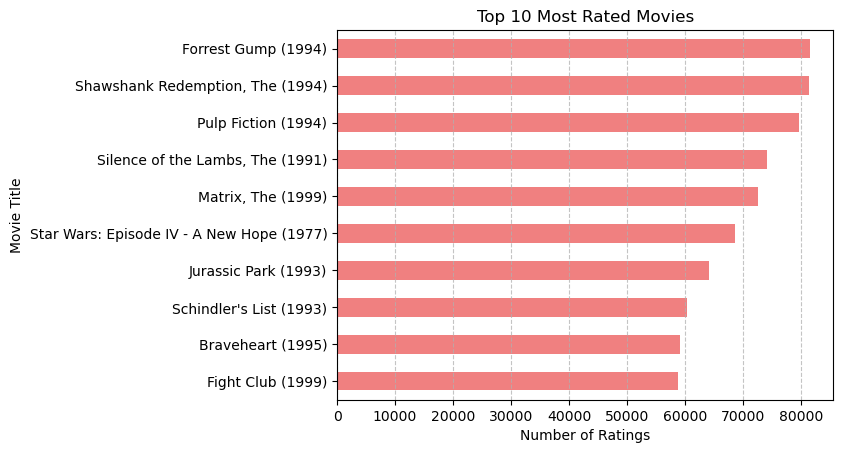

In [43]:
# Distribution of ratings
plt.hist(ratings_movies['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Movie Ratings')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Top 10 most rated movies
top_rated_movies = ratings_movies.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Most Rated Movies:\n", top_rated_movies)

# Plot top-rated movies
top_rated_movies.plot(kind='barh', color='lightcoral')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Rated Movies')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.75)
plt.show()



Top 10 Most Used Tags:
 tag
sci-fi                8330
atmospheric           6516
action                5907
comedy                5702
surreal               5326
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
Name: count, dtype: int64


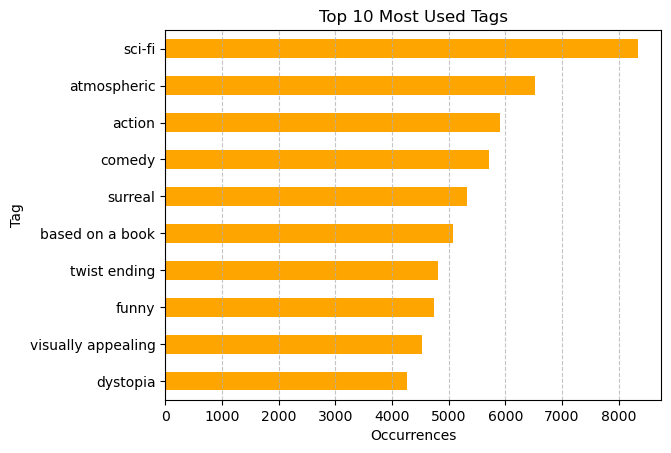

In [44]:
# Most frequently used tags
top_tags = movie_tags['tag'].value_counts().head(10)
print("\nTop 10 Most Used Tags:\n", top_tags)

# Plot top 10 tags
top_tags.plot(kind='barh', color='orange')
plt.xlabel('Occurrences')
plt.ylabel('Tag')
plt.title('Top 10 Most Used Tags')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.75)
plt.show()


Top 10 Most Common Genres:
 Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
dtype: int64


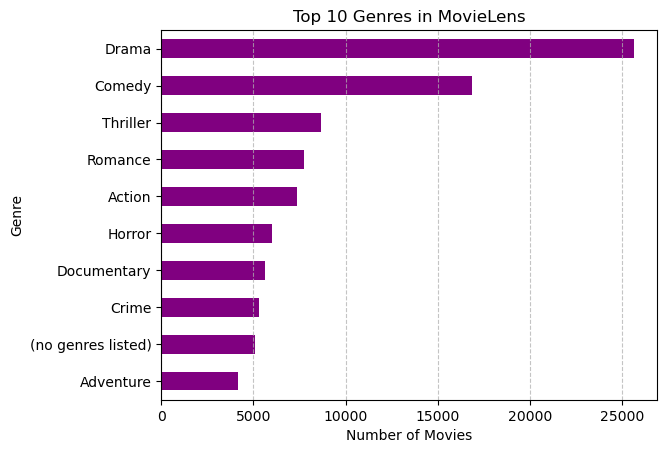

In [45]:
# Extract genre occurrences
genre_counts = movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)
print("\nTop 10 Most Common Genres:\n", genre_counts.head(10))

# Plot top genres
genre_counts.head(10).plot(kind='barh', color='purple')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top 10 Genres in MovieLens')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.75)
plt.show()


User Activity Statistics:
 count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
Name: count, dtype: float64


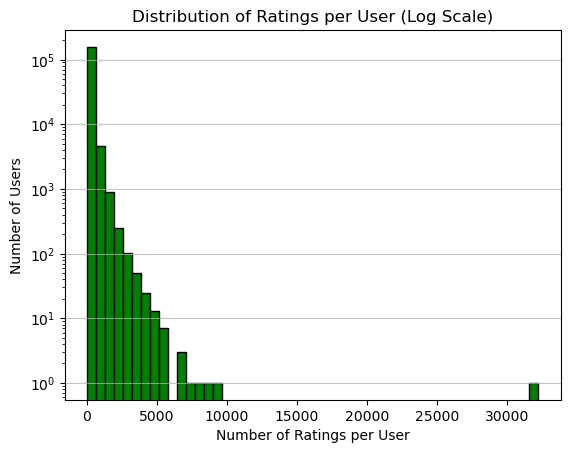

In [46]:
# Ratings per user (activity level)
ratings_per_user = ratings_movies['userId'].value_counts()
print("\nUser Activity Statistics:\n", ratings_per_user.describe())

# Plot distribution of ratings per user
plt.hist(ratings_per_user, bins=50, log=True, color='green', edgecolor='black')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Ratings per User (Log Scale)')
plt.grid(axis='y', alpha=0.75)
plt.show()